# Data Process

In [379]:
import cv2
import numpy as np 
import pandas as pd


c:\programdata\anaconda3\envs\ebox\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [380]:
csv_path = '../data/train.csv'
df = pd.read_csv(csv_path)
# print(df.shape)
# for i in image_name:
#     print(df.iloc[1].age_approx.astype(np.int32))
#     break
name = np.array(df.image_name)
sex = np.array(df.sex)
age = np.array(df.age_approx).astype(np.int32)
location = np.array(df.anatom_site_general_challenge)
label = np.array(df.target)

In [381]:
import collections

def print_dict(d, name = ''):
    for key, value in d.items():
        print(name + str(key) + ':', str(value))

sort_sex = collections.Counter(sex[np.where(label == 1)])
sort_age = collections.Counter(age[np.where(label == 1)])
sort_position = collections.Counter(location[np.where(label == 1)])
number_malignant = np.where(label==1)[0].shape[0]

print('Number malignant: ', number_malignant) 
print_dict(sort_age, 'Age ')
print_dict(sort_position)
print_dict(sort_sex)


Number malignant:  584
Age 55: 64
Age 50: 53
Age 65: 70
Age 75: 62
Age 35: 25
Age 80: 36
Age 30: 24
Age 70: 58
Age 60: 65
Age 40: 24
Age 25: 16
Age 20: 6
Age 90: 16
Age 45: 54
Age 85: 9
Age 15: 2
upper extremity: 111
torso: 257
lower extremity: 124
head/neck: 74
palms/soles: 5
nan: 9
oral/genital: 4
female: 220
male: 364


In [384]:
import os
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt

csv_path = '../data/train.csv'
df = pd.read_csv(csv_path)

name = np.array(df.image_name)
label = np.array(df.target.to_list())

positive = np.where(label == 1)
positive_name = name[positive]

negative = np.where(label == 0)
negative_name = name[negative]

base = 'E:/SIIM/train/'

image_pos = [cv2.imread(base + i + '.jpg') for i in positive_name[:22]]
image_nev = [cv2.imread(base + i + '.jpg') for i in negative_name[:22]]

new_img = [cv2.imread(base + i + '.jpg') for i in new[:22]]

TypeError: ufunc 'add' did not contain a loop with signature matching types dtype('<U14') dtype('<U14') dtype('<U14')

In [ ]:
w=10
h=10
fig=plt.figure(figsize=(15, 15))
columns = 4
rows = 5
for i in range(1, columns*rows +1):
    img = image_pos[i]
    img = img[:,:,::-1]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

In [ ]:
w=10
h=10
fig=plt.figure(figsize=(15, 15))
columns = 4
rows = 5
for i in range(1, columns*rows +1):
    img = image_nev[i]
    img = img[:,:,::-1]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

# Test Evaluation (AUC, ROC, Confusion Matrix)

In [382]:
import numpy as np
from sklearn.metrics import roc_curve, auc, roc_auc_score

np.random.seed(20)
label = [0,1,0,0,0,1,1,0,0,0,0]
predict = np.random.rand(len(label))
# predict = [0,1,0,0,0,1,0,0,0,0,0]
fpr, tpr, thresholds = roc_curve(label, predict, pos_label = 1)

score = roc_auc_score(label, predict)
# predict = predict > 0.5

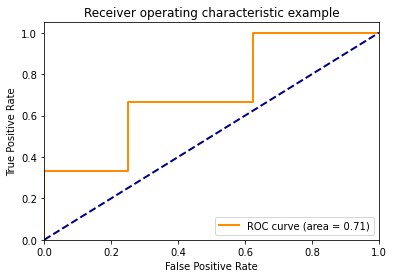

In [383]:
import matplotlib.pyplot as plt
from itertools import cycle
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [ ]:

def evaluate(y_true, predict_score, pos_label = 1, plot = True):
    # AUC score for model
    fpr, tpr, thresholds = roc_curve(y_true, predict_score, pos_label = 1)
    if plot:
        plt.figure()
        lw = 2
        plt.plot(fpr, tpr, color='darkorange',
                lw=lw, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
        plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver operating characteristic example')
        plt.legend(loc="lower right")
        plt.show()
    return auc(fpr, tpr)


label = np.array([0,1,1,1,1,0,0,1,1,1])
np.random.seed(20)
predict = np.random.rand(label.shape[0])
print(predict)
# predict = predict[:,1]
print(label.shape)
print(predict.shape)

evaluate(label, predict)

predict  [1, 1, 1, 1, 0, 1, 0, 1, 1, 0]
label:   [0, 1, 1, 1, 1, 0, 0, 1, 1, 0]
[[2 2]
 [1 5]]


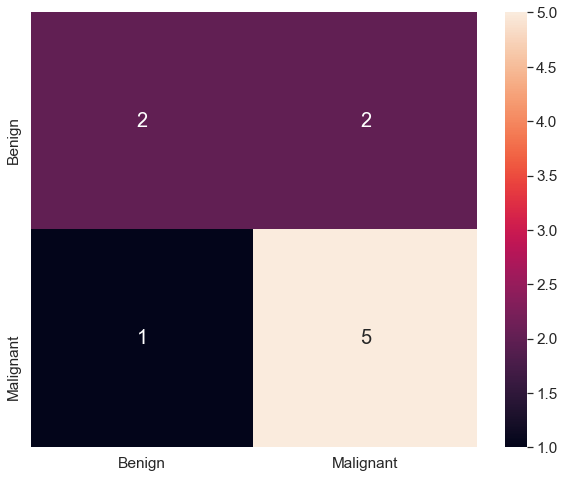

In [13]:
import sklearn.metrics as sk
import seaborn as sn
from matplotlib import pyplot as plt

label = np.array([[0,1,1,1,1,0,0,1,1,0]])
label = np.reshape(label, [max(label.shape)])
# print(label.shape)
np.random.seed(20)
predict = np.random.rand(label.shape[0])
predict = predict > 0.5
print('predict ', [int(i) for i in predict])
print('label:  ',[i for i in label])
confusion = np.round(sk.confusion_matrix(label,predict))
df_cm = pd.DataFrame(confusion, index = [i for i in ["Benign", "Malignant"]],
                    columns = [i for i in ["Benign", "Malignant"]])
plt.figure(figsize = (10,8))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, annot_kws={"size": 20}, fmt="d")
# plt.savefig('')
print(confusion)

# Test Augmentation

In [ ]:
from albumentations import *
import albumentations.pytorch as AT

    transforms = Compose([
        Resize(456, 456),
        Normalize(),
    #     AT.ToTensor()
    ])

def augmentation(p=0.5):
    return Compose([
        RandomRotate90(),
        Flip(),
        Transpose(),
        GaussNoise(),
        Blur(),
        VerticalFlip(),
        HorizontalFlip(),
        Flip(),
        RandomRotate90(),
        HueSaturationValue(hue_shift_limit=5, sat_shift_limit=15, val_shift_limit=10),
        RGBShift(r_shift_limit=10, g_shift_limit=10, b_shift_limit=10),
        RandomBrightness(limit = 0.05),    
    ], p=p)

img = image_pos[2]
aug = augmentation(p = 0.5)
image = aug(image = img)["image"]
image = transforms(image = image)["image"]
cv2.namedWindow('image1', cv2.WINDOW_NORMAL)
cv2.resizeWindow('image1', (800,600))
cv2.namedWindow('image2', cv2.WINDOW_NORMAL)
cv2.resizeWindow('image2', (800,600))
cv2.imshow('image1',img)
cv2.imshow('image2',image)
cv2.waitKey()
cv2.destroyAllWindows()

In [ ]:
import cv2
import numpy as np 
import pandas as pd

from torch.utils.data import Dataset
from matplotlib import pyplot as plt
from info import AllLabel
from sklearn.metrics import roc_curve, auc
from albumentations import (
    RandomRotate90, Flip, Transpose, GaussNoise, Blur, VerticalFlip, HorizontalFlip, Flip, \
    HueSaturationValue, RGBShift, RandomBrightness, Resize, Normalize, Compose)
import albumentations.pytorch as AT


transforms = Compose([
    Resize(456, 456),
    Normalize(),
    AT.ToTensor()
])

dataroot = 'E:/SIIM/train/'

def augmentation(p=0.5):
    return Compose([
        RandomRotate90(),
        Flip(),
        Transpose(),
        GaussNoise(),
        Blur(),
        VerticalFlip(),
        HorizontalFlip(),
        Flip(),
        HueSaturationValue(hue_shift_limit=5, sat_shift_limit=15, val_shift_limit=10),
        RGBShift(r_shift_limit=10, g_shift_limit=10, b_shift_limit=10),
        RandomBrightness(limit = 0.05),    
    ], p=p)

class PyTorchImageDataset(Dataset):
    def __init__(self, image_list, labels):
        self.image_list = image_list
        self.labels = labels
        self.augment = augmentation()
        self.transforms = transforms
         
    def __len__(self):
        return (len(self.image_list))
    
    def __getitem__(self, i):
#         print(dataroot + self.image_list[i] + '.jpg')
        image = cv2.imread(dataroot+self.image_list[i]+ '.jpg')
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        label = self.labels[i]
        if self.transforms is not None:
            image = self.augment(image = image)['image']
            image = self.transforms(image = image)['image']
        return image, label

# Test Split Data

In [ ]:
from sklearn.model_selection import train_test_split

dataframe = pd.read_csv('./../data/train.csv')

IDs = dataframe.image_name.to_list()
labels = dataframe.target.to_list()
train ,val, y_train,y_val = train_test_split(IDs, labels, test_size = 0.2, random_state = 42, shuffle = True)

from torch.utils.data import DataLoader

# train_dataset = PyTorchImageDataset(image_list= train, labels = y_train)
# train_dataloader = DataLoader(dataset=train_dataset, batch_size=32, shuffle=True, num_workers=2)

val_dataset = PyTorchImageDataset(image_list=val, labels=y_val)
val_dataloader = DataLoader(dataset=val_dataset, batch_size=32, shuffle=True, num_workers=0)


# TobyNet, yayyyy!!!

In [ ]:
import cv2
import numpy as np 
import pandas as pd

import torch.nn as nn
from torch.utils.data import Dataset

from matplotlib import pyplot as plt
import albumentations.pytorch as AT
from info import AllLabel
from sklearn.metrics import roc_curve, auc
from albumentations import (
    RandomRotate90, Flip, Transpose, GaussNoise, Blur, VerticalFlip, HorizontalFlip, Flip, \
    HueSaturationValue, RGBShift, RandomBrightness, Resize, Normalize, Compose)

import sys
sys.path.append(r'C:\Users\emage\OneDrive\Desktop\SIIM-ISIC-Melanoma-Classification\efficientnet_pytorch/')


from model import EfficientNet



class TobyNet():
    def __init__(self, model_name, weights_path, **kwags):
        self.model_name = model_name
        self.weights_path = weights_path
        self.num_classes = kwags.pop('num_classes', 1000)
        self.imagenet = kwags.pop('imagenet', False)

    def initModel(self):
        try:
            model = EfficientNet.from_pretrained(self.model_name, weights_path= self.weights_path, num_classes= self.num_classes)
            return model
        except TypeError:
            model = EfficientNet.from_pretrained(self.model_name, weights_path= self.weights_path)
            model._fc = nn.Linear(2048, self.num_classes)
            return model


In [ ]:
import os
weight_path = os.getcwd() + '\\..\\efficientnet_pytorch\\weights\\efficientnet-b5-b6417697.pth'
    
model = TobyNet('efficientnet-b5', weights_path = weight_path)
print(model.initModel())

# Oversampling negative data

In [ ]:
import os
import cv2
import numpy as np

def extract_feature(image):
    blur = cv2.medianBlur(image, 5)
    kernel = np.ones((21,21),np.uint8)
    ret,thresh = cv2.threshold(blur,200,0,cv2.THRESH_BINARY_INV)
#     th3 = cv2.adaptiveThreshold(blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)

#     opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)
#     edges = cv2.Canny(thresh,10,230)
#     print(edges.shape)
    return thresh




image_path = 'E:/SIIM/train/'

for i in os.listdir(image_path):
    image = cv2.imread(image_path +i, 0)
    feature = extract_feature(image)
    
    cv2.namedWindow('image1', cv2.WINDOW_NORMAL)
    cv2.resizeWindow('image1', 800,500)
    cv2.namedWindow('image2', cv2.WINDOW_NORMAL)
    cv2.resizeWindow('image2', 800,500)
#     cv2.imshow('image',image)
    cv2.imshow('image2', feature)
    cv2.imshow('image1', image)
    cv2.waitKey()
    cv2.destroyAllWindows()
    





In [3]:
from sklearn.model_selection import train_test_split
import cv2
import numpy as np 
import pandas as pd

def oversamplingData(X,y, labels_less = 1):
    '''
    Duplicate number of sample which was imbalanced
    '''
    X = np.array(X)
    y = np.array(y)
    position_less = np.where(y==labels_less)
    num_less = len(position_less[0])
    num_more = len(X) - num_less
    scale = num_more//num_less
    scale = scale -1 if scale > 2 else 1
    less_sample = np.repeat(X[position_less], scale) 
    less_label = np.repeat([labels_less], len(less_sample))
    X = np.concatenate((X,less_sample))
    y = np.concatenate((y,less_label))
    return X, y 

dataframe = pd.read_csv('./../data/train.csv')

IDs = dataframe.image_name.to_list()
labels = dataframe.target.to_list()
train ,val, y_train,y_val = train_test_split(IDs, labels, test_size = 0.2, random_state = 42, shuffle = True)

print(len(train))

train, y_train = oversamplingData(X = train, y =y_train)

print(len(train))

26500
40450


# Test SMOTE for image, but seem not good at all, will test again later ☺☻

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 42)
# sm = SMOTE(ratio = 1)

In [ ]:
import os 
base = 'C:/Users/emage/OneDrive/Desktop/image/'
image = cv2.imread('C:/Users/emage/OneDrive/Desktop/something.png')
ori_shape = (608,608)
image = cv2.resize(image, ori_shape, cv2.INTER_LINEAR)
image = np.reshape(image, [1] + list(image.shape))
for i in os.listdir(base):
    new = cv2.imread(base + i)
    new = cv2.resize(new, ori_shape, cv2.INTER_LINEAR)
    new = np.reshape(new, [1] + list(new.shape))
    image = np.concatenate((image,new), axis = 0)

In [ ]:
for img in image:
    cv2.imshow('image', img)
    cv2.waitKey()
    cv2.destroyAllWindows()

In [ ]:
import cv2
import numpy as np

print(image.shape)

# image = cv2.imread('C:/Users/emage/OneDrive/Desktop/something.png')
# ori_shape = image.shape
# image = np.reshape(image, [1] + list(image.shape))
# batch = np.repeat(image, repeats = 10, axis = 0)

batch = np.reshape(image, (-1,np.prod(np.array(ori_shape))*3))

label = np.array([0,0,0,0,0,0,0,1,1,1,1,1,1])
# # label = 

print(batch.shape, label.shape)
X, y = sm.fit_resample(batch, label)

print(X.shape)

batch = np.reshape(X, [-1] + list(ori_shape) +[3])
for img in batch:
    cv2.imshow('image', img)
    cv2.waitKey()
    cv2.destroyAllWindows()

In [455]:
from albumentations import *

def aug(p = 0.5):
    return Compose([
    RandomContrast(always_apply = True)
    ], p =p)

aug = aug()
# image = cv2.imread('C:/Users/emage/OneDrive/Desktop/something.png')
image = cv2.imread('E:/SIIM/train_resize/ISIC_0015719.jpg')
image = cv2.resize(image, (448,448), cv2.INTER_AREA)
image = aug(image = image)['image']
print(image.shape)
cv2.imshow('image', image)
cv2.waitKey()
cv2.destroyAllWindows()

(448, 448, 3)


# Class weight ♥♦♣♠

In [4]:
import pandas as pd
from sklearn.utils.class_weight import compute_class_weight
path = 'C:/Users/emage/OneDrive/Desktop/SIIM-ISIC-Melanoma-Classification/data/train.csv'
df = pd.read_csv(path)
y = df.target
print(compute_class_weight('balanced', [0,1], y))

[0.77683887 1.40305238]


c:\programdata\anaconda3\envs\ebox\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass classes=[0, 1], y=[0 0 0 ... 1 1 1] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
